<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [25]:
!pip install  sklearn.preprocessing 

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [26]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-07-11 19:25:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  76.2MB/s    in 2.0s    

2025-07-11 19:25:35 (76.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [58]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [59]:
import seaborn as sns

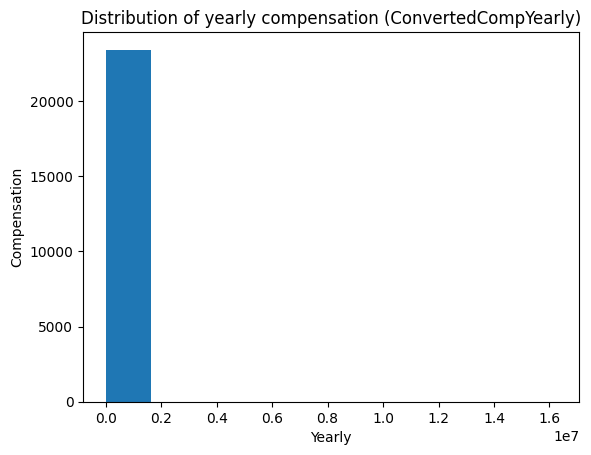

In [60]:
## Write your code here

df['ConvertedCompYearly'].plot(kind='hist')
plt.title('Distribution of yearly compensation (ConvertedCompYearly)')
plt.xlabel('Yearly')
plt.ylabel('Compensation')
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



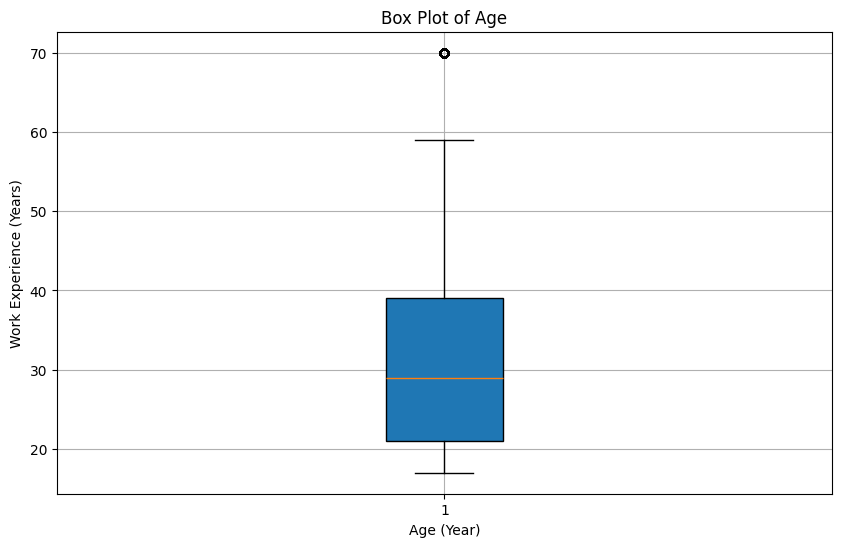

In [78]:
# Create a dictionary to map age ranges to numerical values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None}

df['AgeNum'] = df['Age'].map(age_mapping)

#remove duplicate values
age_numeric = df['AgeNum'].dropna()

#Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(age_numeric, vert=True, patch_artist=True)
plt.title('Box Plot of Age')
plt.xlabel('Age (Year)')
plt.ylabel('Work Experience (Years)')
plt.grid(True)
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



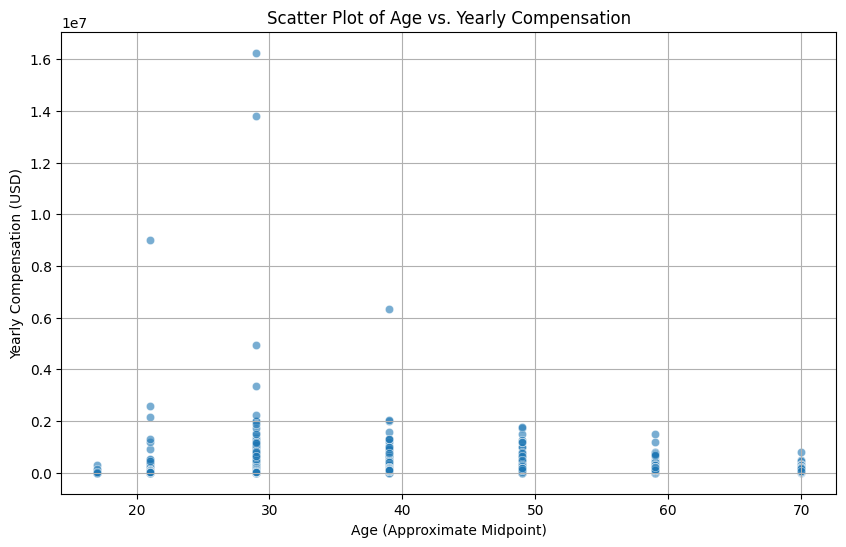

In [83]:
## Write your code here
## Write your code here


# Step 1: Map age ranges to numeric midpoints
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Step 2: Apply the mapping to create a numeric age column
df['Age_numeric'] = df['Age'].map(age_mapping)

# Step 3: Convert compensation to numeric (handles missing and bad entries)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Step 4: Filter out rows with missing age or compensation
df_filtered = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])

# Step 5: Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Age_numeric', y='ConvertedCompYearly', alpha=0.6)

# Add titles and labels
plt.title('Scatter Plot of Age vs. Yearly Compensation')
plt.xlabel('Age (Approximate Midpoint)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


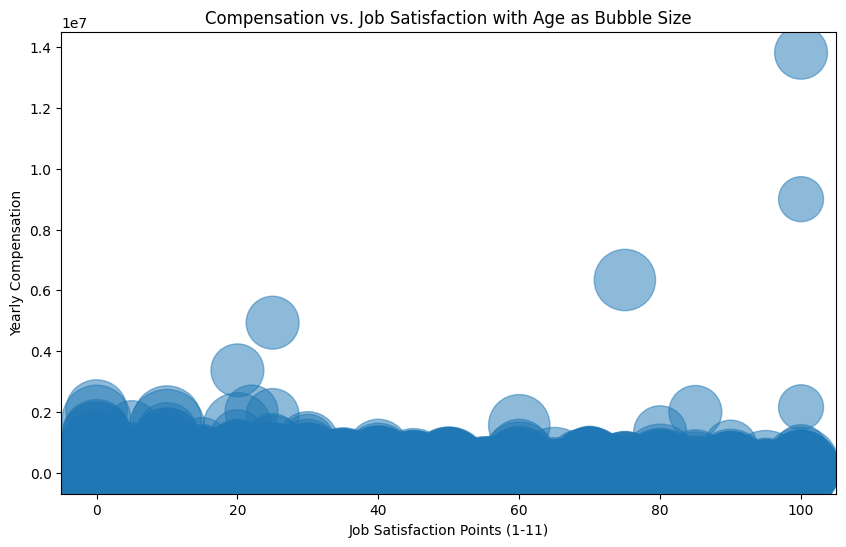

In [69]:
## Write your code here
# Filter out missing values
df_filtered = df[(df['ConvertedCompYearly'].notna()) & 
                 (df['JobSatPoints_6'].notna()) & 
                 (df['Age'].notna())]

# Create a dictionary to map age ranges to numerical values
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7}

# Apply the mapping using apply
#df_filtered['AgeNum'] = df_filtered['Age'].apply(lambda x: age_mapping.get(x, x))

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['JobSatPoints_6'], 
            df_filtered['ConvertedCompYearly'], 
            s=df_filtered['AgeNum'] * 50,  # Adjust bubble size scaling as needed
            alpha=0.5)

# Set labels and title
plt.xlabel('Job Satisfaction Points (1-11)')
plt.ylabel('Yearly Compensation')
plt.title('Compensation vs. Job Satisfaction with Age as Bubble Size')

# Show the plot
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



/tmp/ipykernel_1586/4248651962.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_roles.values, y=top_roles.index, palette='viridis')


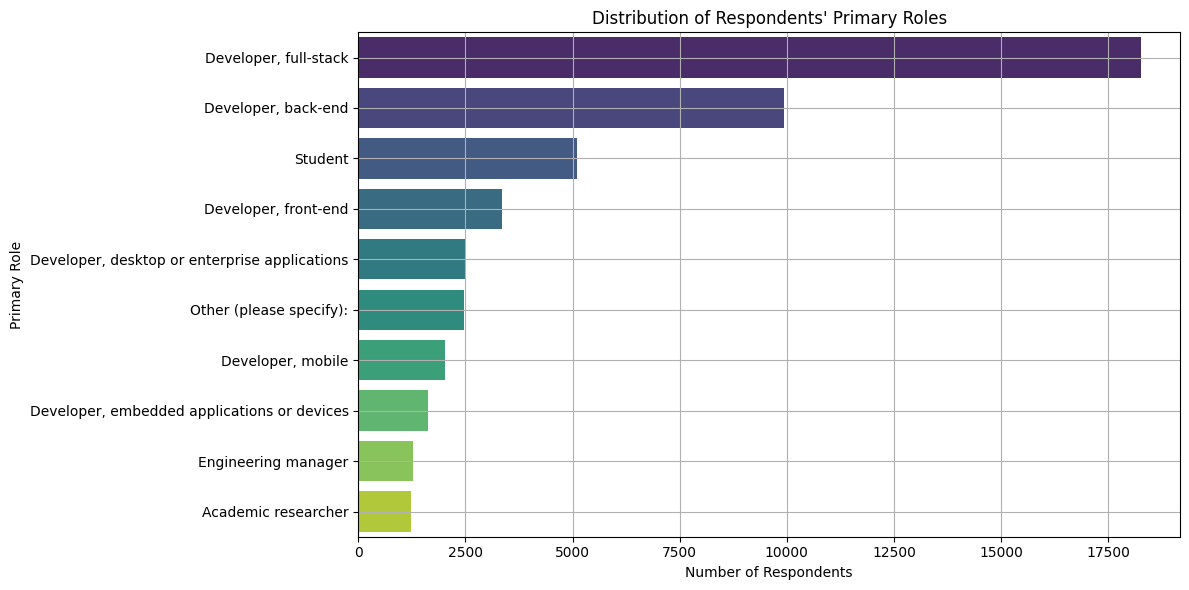

In [84]:
## Write your code here

# Step 1: Look at the top 10 most common roles (optional, for clarity)
top_roles = df['DevType'].value_counts().nlargest(10)

# Step 2: Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=top_roles.values, y=top_roles.index, palette='viridis')

# Step 3: Add labels and title
plt.title("Distribution of Respondents' Primary Roles")
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



/tmp/ipykernel_1586/4130529298.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.values[:10], y=language_counts.index[:10], palette='viridis')


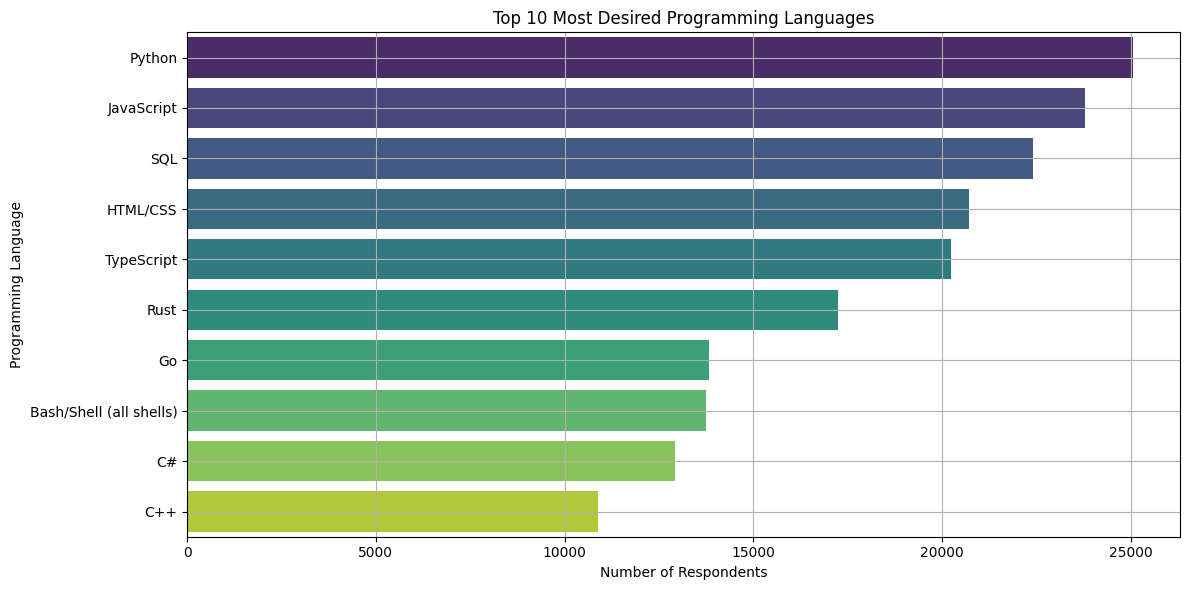

In [85]:
## Write your code here
# Step 1: Drop missing values
df_languages = df.dropna(subset=['LanguageWantToWorkWith'])

# Step 2: Split entries and explode into separate rows
df_languages = df_languages.assign(
    Language=df_languages['LanguageWantToWorkWith'].str.split(';')
).explode('Language')

# Step 3: Remove whitespace and count frequencies
df_languages['Language'] = df_languages['Language'].str.strip()
language_counts = df_languages['Language'].value_counts()

# Step 4: Plot the top 10 desired languages
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.values[:10], y=language_counts.index[:10], palette='viridis')

plt.title('Top 10 Most Desired Programming Languages')
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


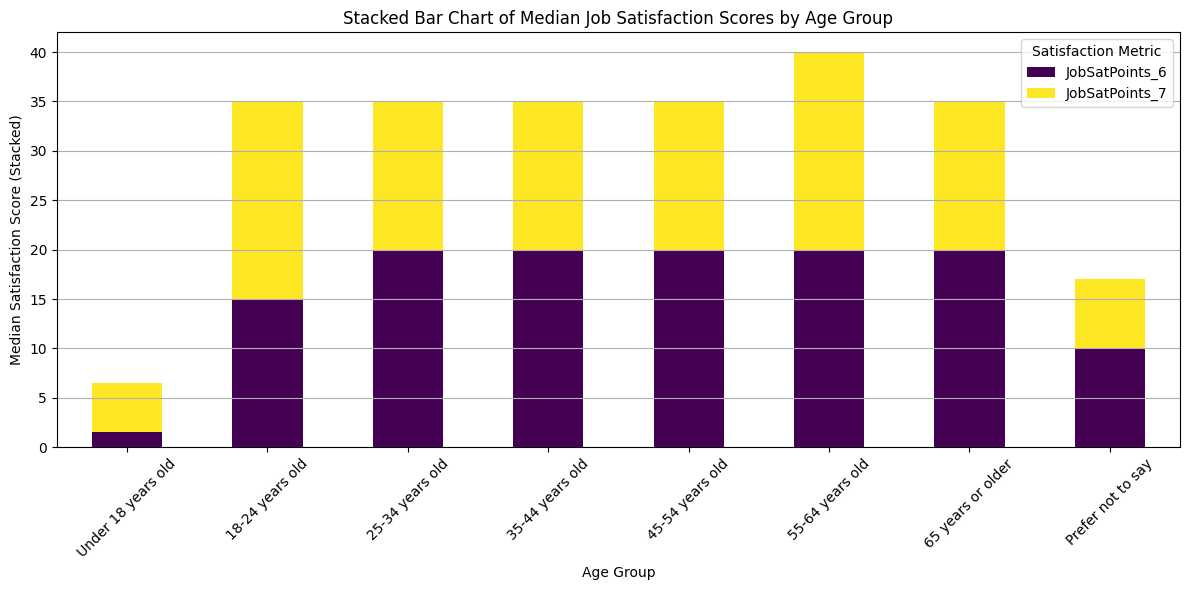

In [88]:
## Write your code here


# Step 1: Drop missing values for relevant columns
df_filtered = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 2: Calculate the median for each satisfaction point per age group
grouped = df_filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Optional: Sort age groups logically
ordered_age = ['Under 18 years old', '18-24 years old', '25-34 years old', 
               '35-44 years old', '45-54 years old', '55-64 years old', 
               '65 years or older', 'Prefer not to say']
grouped = grouped.reindex(ordered_age).dropna(how='all')

# Step 3: Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Step 4: Customize plot
plt.title('Stacked Bar Chart of Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score (Stacked)')
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'], title='Satisfaction Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



/tmp/ipykernel_1586/2711796803.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=database_counts.values[:10], y=database_counts.index[:10], palette='viridis')


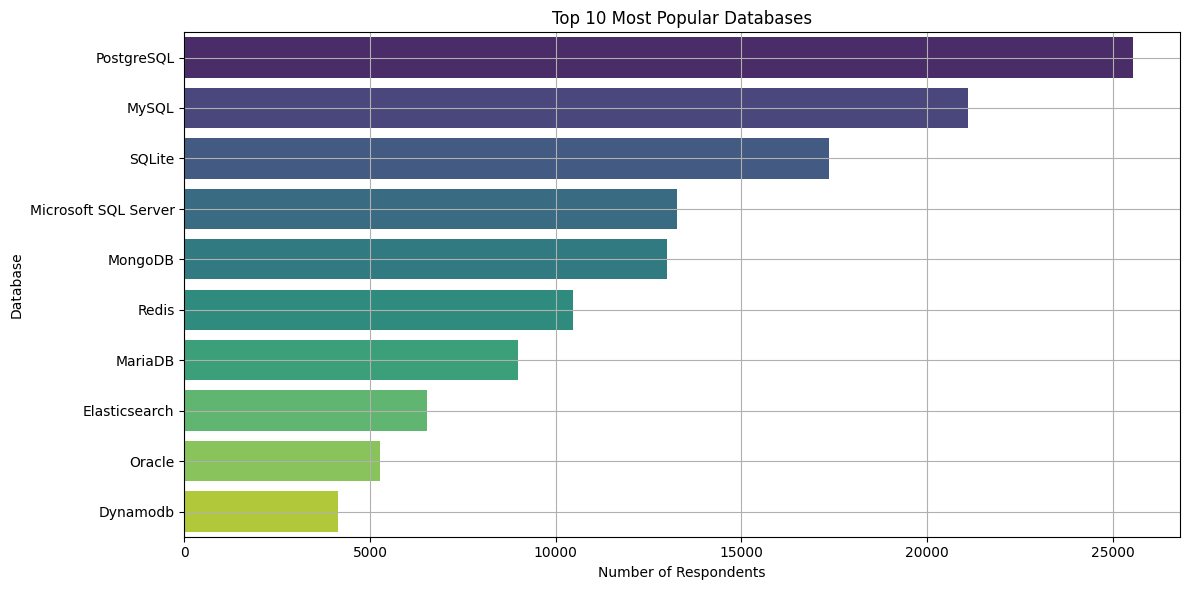

In [89]:
## Write your code here
# Step 1: Drop missing values
df_db = df.dropna(subset=['DatabaseHaveWorkedWith'])

# Step 2: Split multiple database entries and explode into separate rows
df_db = df_db.assign(Database=df_db['DatabaseHaveWorkedWith'].str.split(';')).explode('Database')

# Step 3: Clean up whitespace
df_db['Database'] = df_db['Database'].str.strip()

# Step 4: Count each database
database_counts = df_db['Database'].value_counts()

# Step 5: Plot the top 10 databases
plt.figure(figsize=(12, 6))
sns.barplot(x=database_counts.values[:10], y=database_counts.index[:10], palette='viridis')

plt.title('Top 10 Most Popular Databases')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_1586/3359940578.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_comp_by_age.index, y=median_comp_by_age.values, palette='viridis')


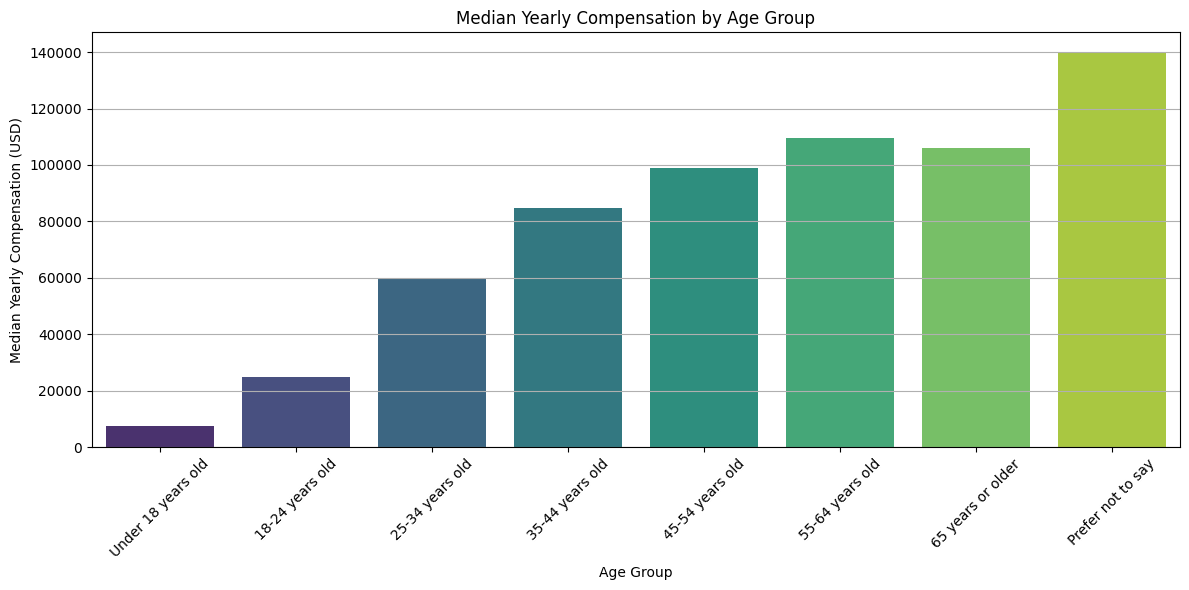

In [90]:
## Write your code here
# Step 1: Clean the data
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df_filtered = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Step 2: Calculate median salary per age group
median_comp_by_age = df_filtered.groupby('Age')['ConvertedCompYearly'].median()

# Optional: Sort age groups logically
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', 
             '65 years or older', 'Prefer not to say']
median_comp_by_age = median_comp_by_age.reindex(age_order).dropna()

# Step 3: Plot the grouped bar chart (1 bar per group)
plt.figure(figsize=(12, 6))
sns.barplot(x=median_comp_by_age.index, y=median_comp_by_age.values, palette='viridis')

plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



/tmp/ipykernel_1586/3611707871.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values[:10], y=country_counts.index[:10], palette='viridis')


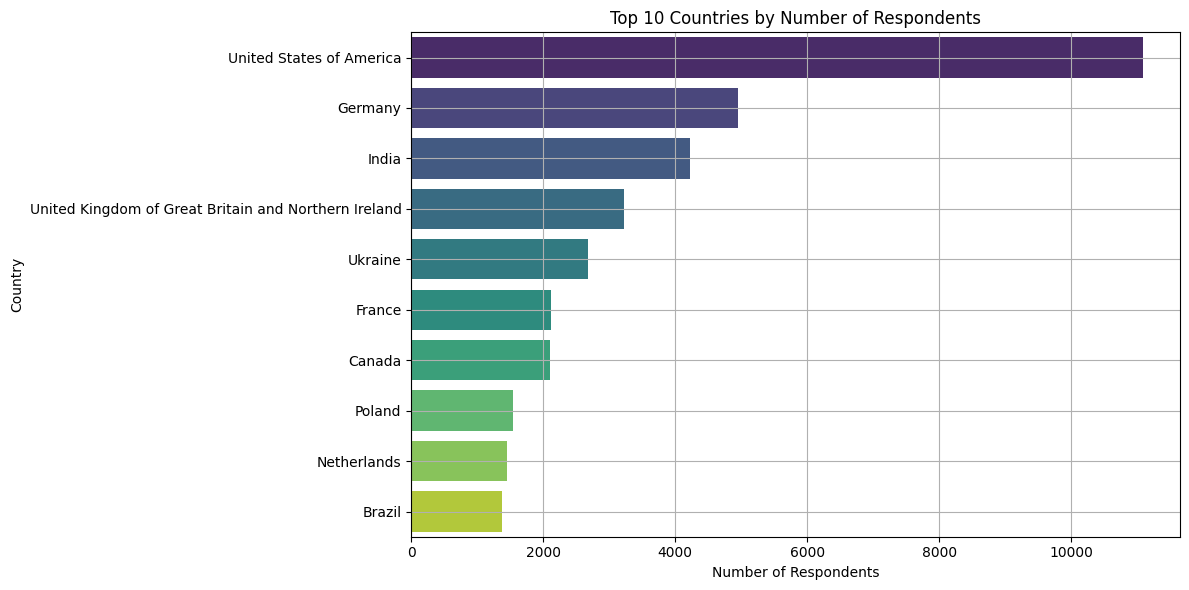

In [91]:
## Write your code here
# Step 1: Drop missing values in the 'Country' column
df_country = df.dropna(subset=['Country'])

# Step 2: Count respondents per country
country_counts = df_country['Country'].value_counts()

# Step 3: Plot the top 10 countries (or more if desired)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values[:10], y=country_counts.index[:10], palette='viridis')

# Step 4: Customize chart
plt.title('Top 10 Countries by Number of Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
